In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
df['v1'] = df['v1'].apply(lambda x:0 if x == 'ham' else 1)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [10]:
df.head()
# df.shape

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.describe(include=object)

,v2
count,5572
unique,5169
top,"Sorry, I'll call later"
freq,30


In [12]:
# df.drop_duplicated(keep='frist', inplace=True)
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.shape

(5169, 2)

In [14]:
# count total haam and spam values
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

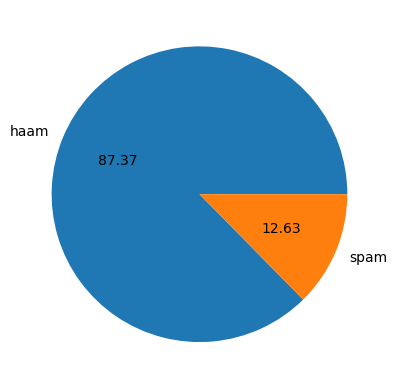

In [15]:
# show pie chart
plt.pie(df['v1'].value_counts(), labels=["haam", "spam"], autopct='%0.2f')
plt.show()

In [16]:
# Now count number of characters, words and sentans
import nltk

In [17]:
# nltk.download('punkt')


In [18]:
# create column which store number of characters
df["num_char"] = df['v2'].apply(len)

In [19]:
# create column which store number of words
df["num_words"] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df["num_sentences"] = df["v2"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,v1,v2,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
# Describe numbers of char, words and sentences
print(df[["num_char", "num_words", "num_sentences"]].describe(), "\n")

## spam
spam = df[df['v1'] == 1][["num_char", "num_words", "num_sentences"]].describe()
print("For Spam \n",spam, "\n")

## haam
haam = df[df['v1'] == 0][["num_char", "num_words", "num_sentences"]].describe()
print("For Haam")
haam


          num_char    num_words  num_sentences
count  5169.000000  5169.000000    5169.000000
mean     78.977945    18.455794       1.965564
std      58.236293    13.324758       1.448541
min       2.000000     1.000000       1.000000
25%      36.000000     9.000000       1.000000
50%      60.000000    15.000000       1.000000
75%     117.000000    26.000000       2.000000
max     910.000000   220.000000      38.000000 

For Spam 
          num_char   num_words  num_sentences
count  653.000000  653.000000     653.000000
mean   137.891271   27.667688       2.970904
std     30.137753    7.008418       1.488425
min     13.000000    2.000000       1.000000
25%    132.000000   25.000000       2.000000
50%    149.000000   29.000000       3.000000
75%    157.000000   32.000000       4.000000
max    224.000000   46.000000       9.000000 

For Haam


,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


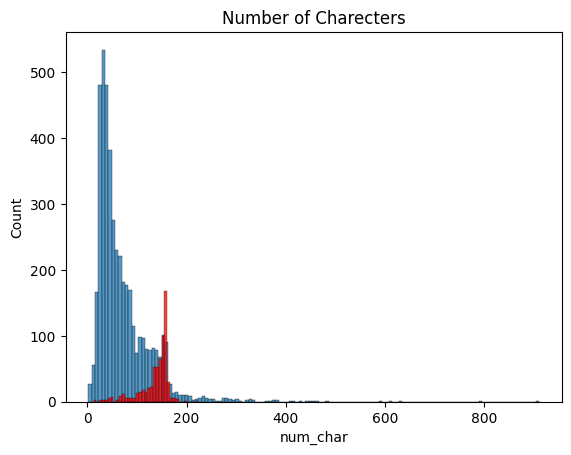

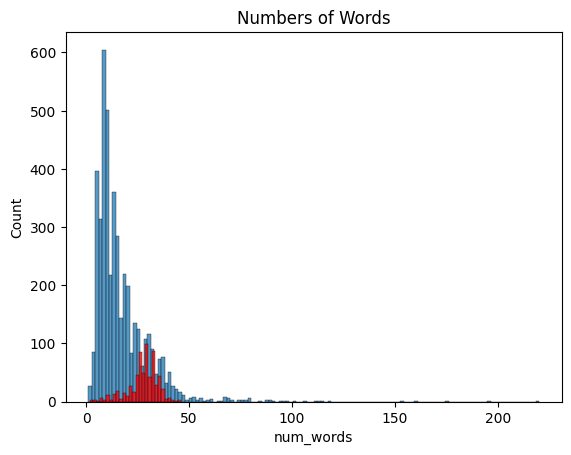

Text(0.5, 1.0, 'Numbers of Sentences')

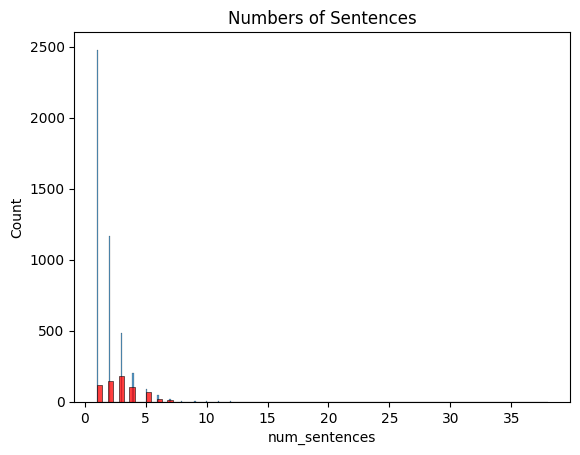

In [23]:
# NOW plot histogram
sns.histplot(df[df['v1'] == 0]['num_char'])
sns.histplot(df[df['v1'] == 1]['num_char'], color='red')
plt.title("Number of Charecters")
plt.show()

sns.histplot(df[df['v1'] == 0]['num_words'])
sns.histplot(df[df['v1'] == 1]['num_words'], color='red')
plt.title("Numbers of Words")
plt.show()

sns.histplot(df[df['v1'] == 0]['num_sentences'])
sns.histplot(df[df['v1'] == 1]['num_sentences'], color='red')
plt.title("Numbers of Sentences")

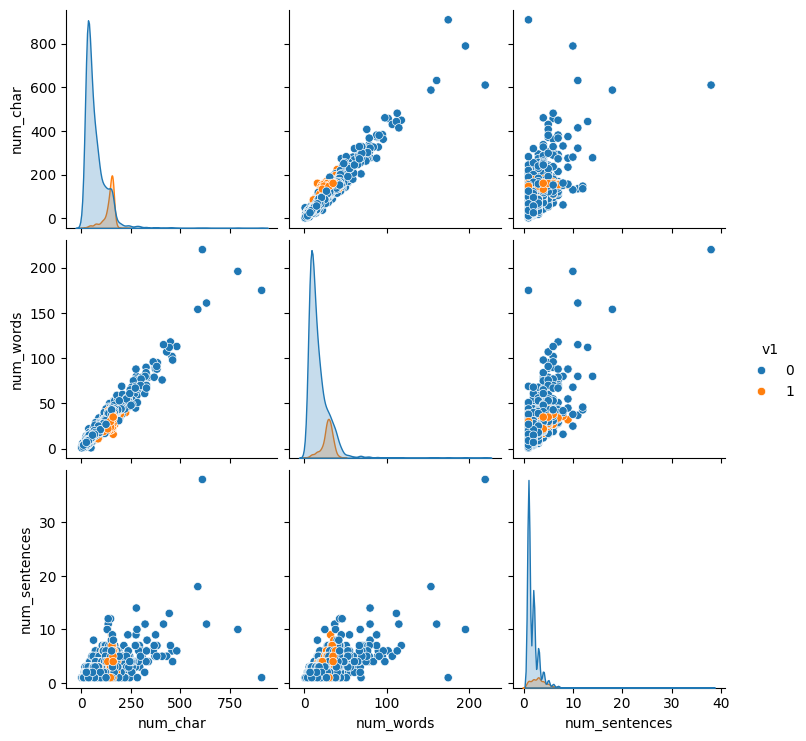

In [24]:
# Find relestionship ech other
sns.pairplot(df, hue='v1')

<Axes: >

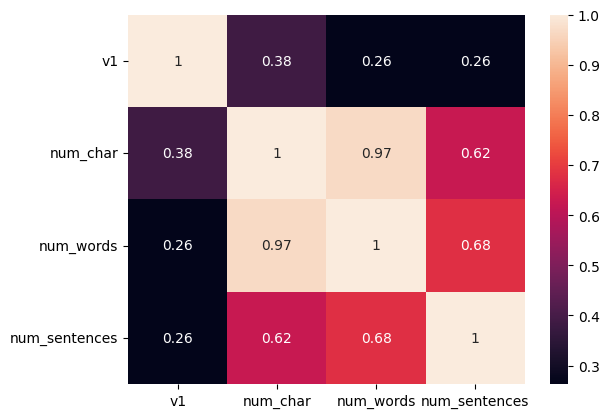

In [25]:
df.corr(numeric_only=True) #Use df.corr(numeric_only=True) to avoid non-numeric columns
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [26]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

from string import punctuation
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

# create function
def tranform_text(text):
    text = text.lower() #convert upper to lower charechters
    text = nltk.word_tokenize(text) # splite words

    # remove spacial char
    y=[]
    for i in text:
        if i.isalnum(): # isalnum () method is used to check whether the string consists of alphanumeric characters.
            y.append(i)

    # Remove Stop words
    text = y[:] # create clone of y (we can copy y)
    y.clear() 

    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)

    #in nltk.stem.porter import PorterStemmer :: remove similer words and convert in to one word
    #Example = [loved, loving, love, loves] == "love"
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [27]:
tranform_text("As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589")
tranform_text("Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged")

'thank subscript rington uk mobil charg pleas confirm repli ye repli charg'

In [28]:
df['v2'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [29]:
# now apply tranform_text() this function on dataframe
# Now create new column tranform_text in we can apply above function on v2 column
# we create becuace in feture any problem on tranform_text column than we don't backtrack all code we derectly access "v2" column

df['tranform_text'] = df["v2"].apply(tranform_text)

In [30]:
df.head()

,v1,v2,num_char,num_words,num_sentences,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


WORD CLOUD

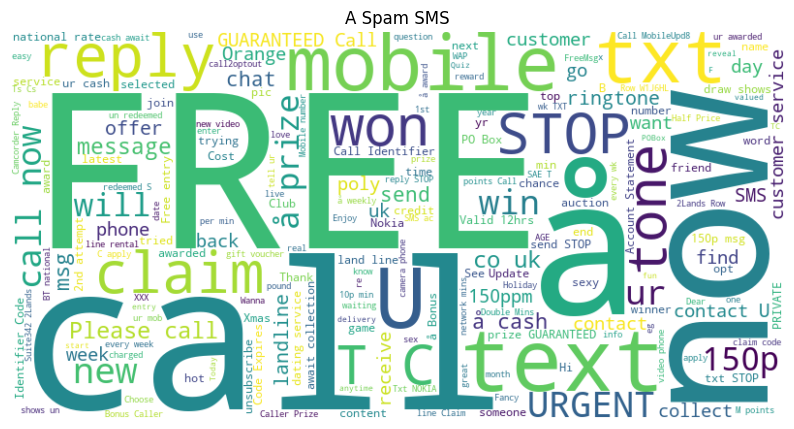

In [31]:
from wordcloud import WordCloud

spam_df = df[df['v1'] == 1]
spam_df.shape
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')#,bilinear, 'spline36', 'hanning', 'quadric', 'sinc', 'none', 'lanczos', 'bicubic', 'bessel', 'kaiser', 'blackman', 'spline16', 'hermite', 'catrom', 'nearest', 'hamming', 'mitchell', 'gaussian', 'antialiased')
# plt.imshow(wordcloud, interpolation='catrom')#,bilinear, 'spline36', 'hanning', 'quadric', 'sinc', 'none', 'lanczos', 'bicubic', 'bessel', 'kaiser', 'blackman', 'spline16', 'hermite', 'catrom', 'nearest', 'hamming', 'mitchell', 'gaussian', 'antialiased')

plt.axis('off')
plt.title('A Spam SMS')
plt.show()

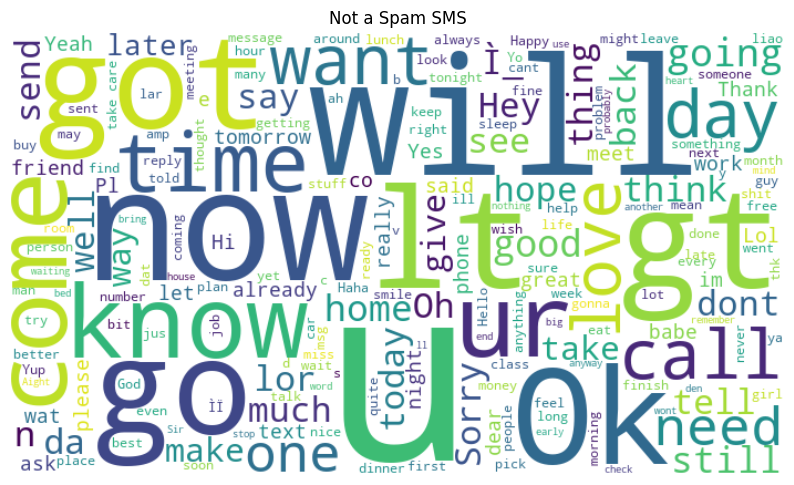

In [32]:
spam_not_df = df[df['v1'] == 0]
spam_not_df.shape
spam_not_text = ' '.join(spam_not_df['v2'])

wordcloud = WordCloud(width=700, height=400, background_color='white').generate(spam_not_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not a Spam SMS')
plt.show()

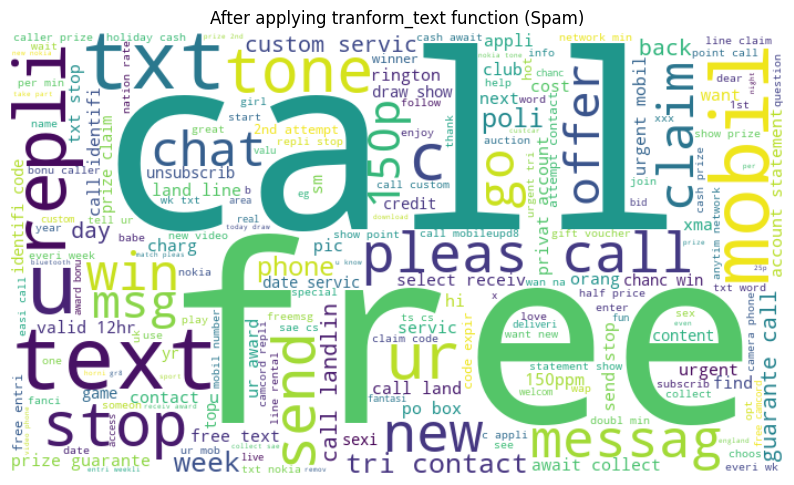

In [33]:
# create WordCloud after applying tranform_text function 
spam_df = df[df['v1'] == 1]['tranform_text'].str.cat(sep=" ")

wordcloud = WordCloud(width=700, height=400, background_color='white').generate(spam_df)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('After applying tranform_text function (Spam)')
plt.show()

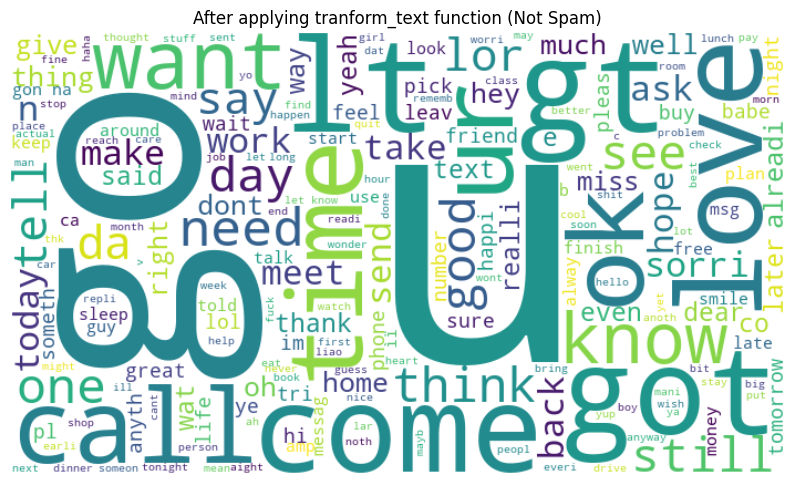

In [34]:
# create WordCloud after applying tranform_text function 
spam_not_df = df[df['v1'] == 0]['tranform_text'].str.cat(sep=" ")

wordcloud = WordCloud(width=700, height=400, background_color='white').generate(spam_not_df)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('After applying tranform_text function (Not Spam)')
plt.show()

In [35]:
# show top 15 words which most uses (Spam or ham)
spam_words = []
for msg in df[df['v1'] == 1]['tranform_text'].tolist(): #create list
    # print(msg)
    for words in msg.split():
        spam_words.append(words)

ham_words = []
for msg in df[df['v1'] == 0]['tranform_text'].tolist(): #create list
    # print(msg)
    for words in msg.split():
        ham_words.append(words)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

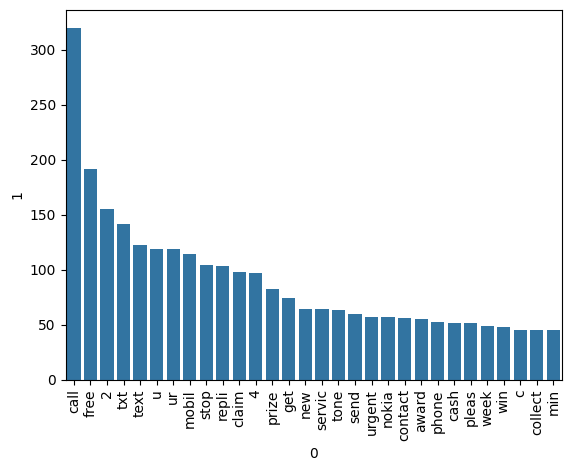

In [36]:
from collections import Counter
counts = Counter(spam_words).most_common(30)
# print(counts)

most_count_spam_df = pd.DataFrame(counts, columns=['Word', 'Count'])
most_count_spam_df

sns.barplot(x=pd.DataFrame(counts)[0], y=pd.DataFrame(counts)[1])
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

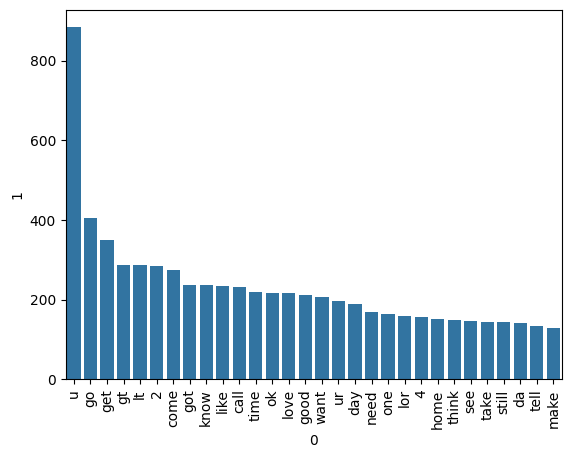

In [37]:
from collections import Counter
counts = Counter(ham_words).most_common(30)
# print(counts)

most_count_ham_df = pd.DataFrame(counts, columns=['Word', 'Count'])
most_count_ham_df

sns.barplot(x=pd.DataFrame(counts)[0], y=pd.DataFrame(counts)[1])
plt.xticks(rotation='vertical')

Model Building

In [67]:
## tag(txt) convert to Vactor : textvactorizetion (we use bag of words technics)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=50000)


In [68]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# # Example of using SimpleRNN in Keras
# model = Sequential()
# model.add(SimpleRNN(units=64, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dense(units=1, activation='softmax'))

# # Example of using LSTM in Keras
# model = Sequential()
# model.add(LSTM(units=64, input_shape=(timesteps, input_dim)))
# model.add(Dense(units=num_classes, activation='softmax'))

# # Compile and train the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, batch_size=32)


"Data is imbalence so in this case precision score heigh meter

CountVectorizer:
gmb => accuracy -->  0.8704061895551257,  precision_score -- >  0.4752186588921283
mnb => accuracy -->  0.9729206963249516,  precision_score -- >  0.8697916666666666
bnb => accuracy -->  0.9716312056737588,  precision_score -- >  0.9605263157894737   "Best"

TfidfVectorizer:
gmb => accuracy -->  0.8723404255319149,  precision_score -- >  0.509090909090909
mnb => accuracy -->  0.9458413926499033,  precision_score -- >  1.0                 "Best"
bnb => accuracy -->  0.9645390070921985,  precision_score -- >  0.9806451612903225  "Good"

CountVectorizer:
gmb => accuracy -->  ,  precision_score -- >
mnb => accuracy -->  ,  precision_score -- >
bnb => accuracy -->  ,  precision_score -- >

In [69]:
# Count Vectorizer

# X = cv.fit_transform(df['tranform_text']).toarray()
# X.shape

# tfid Vectorizer
X = tfidf.fit_transform(df['tranform_text']).toarray()
X.shape

y = df['v1'].values # v1 is traget variable
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
# ex = tfidf.fit_transform(["As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589"]).toarray()
# ex

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3)

In [72]:
print(len(X_train))
print(len(X_test))

3618
1551


In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
gnb_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

accuracy_score:  0.8762088974854932
precision_score:  0.49226006191950467

Classificatiom Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1364
           1       0.49      0.85      0.62       187

    accuracy                           0.88      1551
   macro avg       0.73      0.87      0.77      1551
weighted avg       0.92      0.88      0.89      1551



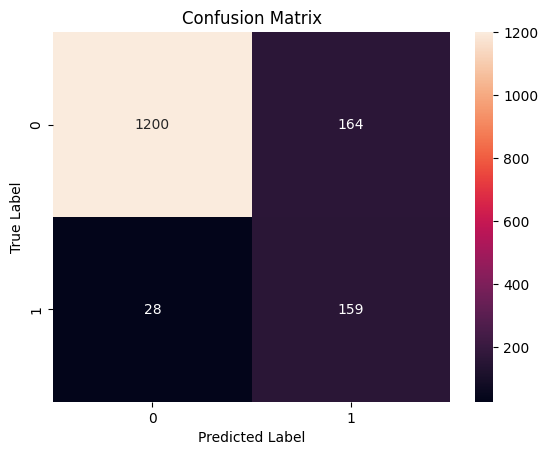

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

print("accuracy_score: ",accuracy_score(y_test, gnb_pred))
print("precision_score: ",precision_score(y_test, gnb_pred))

print("\nClassificatiom Report:")
print(classification_report(y_test, gnb_pred))

sns.heatmap(confusion_matrix(y_test, gnb_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 0 0 0]
accuracy_score:  0.9600257898130239
precision_score:  1.0

Classificatiom Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1364
           1       1.00      0.67      0.80       187

    accuracy                           0.96      1551
   macro avg       0.98      0.83      0.89      1551
weighted avg       0.96      0.96      0.96      1551



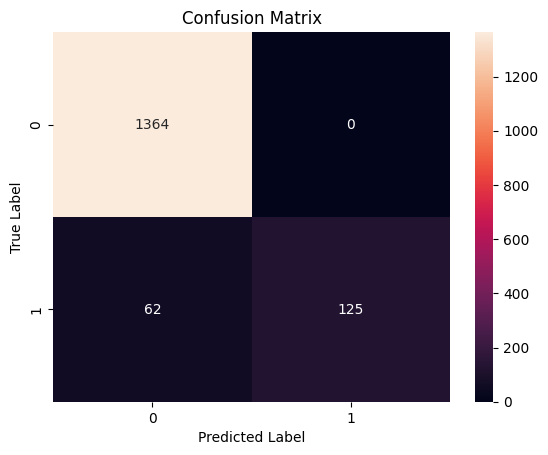

In [78]:
print(X_test)
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print(mnb_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

print("accuracy_score: ",accuracy_score(y_test, mnb_pred))
print("precision_score: ",precision_score(y_test, mnb_pred))

print("\nClassificatiom Report:")
print(classification_report(y_test, mnb_pred))

sns.heatmap(confusion_matrix(y_test, mnb_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy_score:  0.9709864603481625
precision_score:  0.9551282051282052

Classificatiom Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1364
           1       0.96      0.80      0.87       187

    accuracy                           0.97      1551
   macro avg       0.96      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551



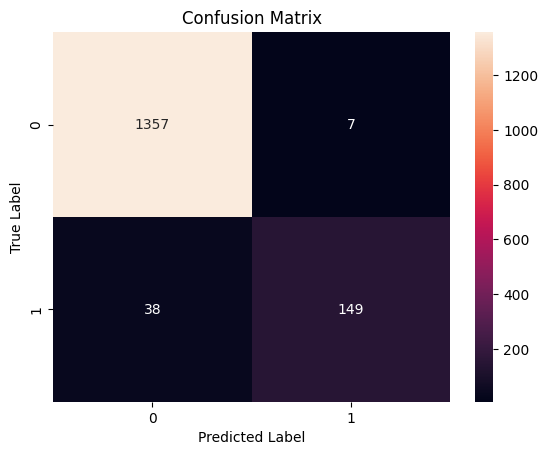

In [79]:
bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
bnb_pred

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

print("accuracy_score: ",accuracy_score(y_test, bnb_pred))
print("precision_score: ",precision_score(y_test, bnb_pred))

print("\nClassificatiom Report:")
print(classification_report(y_test, bnb_pred))

sns.heatmap(confusion_matrix(y_test, bnb_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [108]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier()
skc = StackingClassifier(estimators=[rfc, etc, xgb], final_estimator=lrc)

In [118]:
clf = StackingClassifier(
    estimators=[('rfc', rfc), ('etc', etc), ('xgb', xgb)],
    final_estimator=lrc
)

In [119]:
# Train the StackingClassifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

Accuracy: 0.88
Precision: 0.77


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AB' : abc,
    'BG' : bgc,
    'ETC' : etc,
    'GB' : bgc,
    'XGB' : xgb,
    
    
}

In [105]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [120]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9929078014184397)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9761444229529336
Precision -  0.9617834394904459
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
For  NB
Accuracy -  0.9645390070921985
Precision -  1.0
For  DT
Accuracy -  0.9426176660219213
Precision -  0.8120805369127517
For  LR
Accuracy -  0.9509993552546744
Precision -  0.8897058823529411
For  RF
Accuracy -  0.9780786589297228
Precision -  1.0


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AB
Accuracy -  0.961960025789813
Precision -  0.896774193548387
For  BG
Accuracy -  0.9593810444874274
Precision -  0.8324022346368715
For  GB
Accuracy -  0.9593810444874274
Precision -  0.8324022346368715
For  XGB
Accuracy -  0.9722759509993553
Precision -  0.9212121212121213


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.964539,1.000000
5,RF,0.978079,1.000000
0,SVC,0.976144,0.961783
9,XGB,0.972276,0.921212
6,AB,0.961960,0.896774
4,LR,0.950999,0.889706
7,BG,0.959381,0.832402
8,GB,0.959381,0.832402
3,DT,0.942618,0.812081


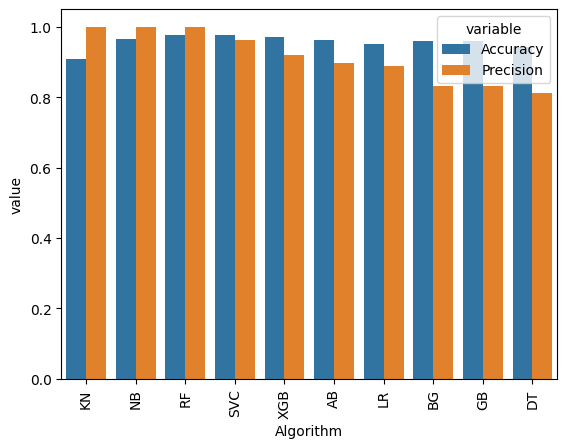

In [ ]:
# Melting the DataFrame to have a long-form DataFrame for seaborn
df_melted = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'Precision'])

sns.barplot(data=df_melted, x='Algorithm', y='value', hue='variable')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
tranform_sms = tranform_text("Claim your inheritance! ontact  for more information on how to receive $10,000,000.")
## Vectorize
vector_input = tfidf.transform([tranform_sms]).toarray()
print(vector_input)
## Predict

result = mnb.predict(vector_input)[0]
result1 = rfc.predict(vector_input)[0]
print(result,"\n",result1)

[[0. 0. 0. ... 0. 0. 0.]]
1 
 1


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))